## 📊 Exploratory Data Analysis (EDA): Feature Distributions


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df=pd.read_csv("/content/titanic_toy.csv")

In [78]:
df.sample(5)

,Age,Fare,Family,Survived
661,40.0,7.225,0,0
366,60.0,75.250,1,1
407,3.0,18.750,2,1
288,42.0,13.000,0,1
56,21.0,10.500,0,1


In [79]:
df.drop(columns=['Family'],inplace=True)

/tmp/ipython-input-1742348073.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
/tmp/ipython-input-1742348073.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


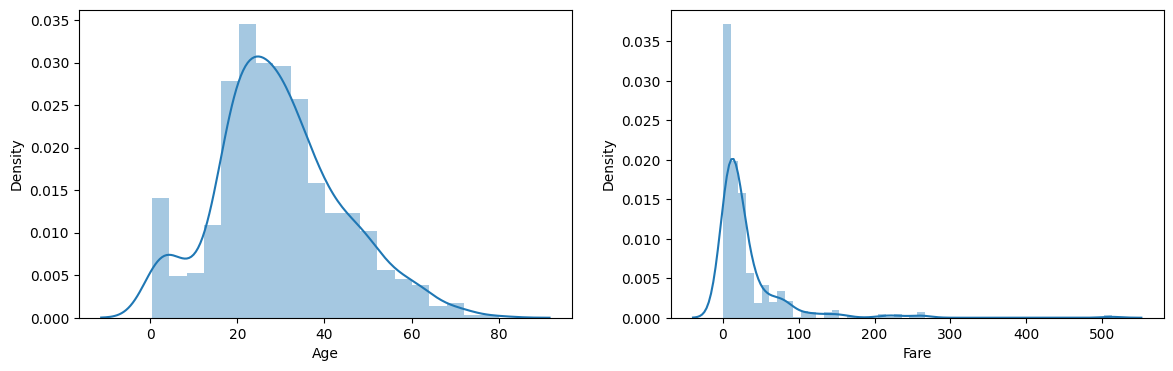

In [80]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(df['Age'])

plt.subplot(122)
sns.distplot(df['Fare'])
plt.show()

## 📐 Statistical Summary & Outlier Detection


In [81]:
print("mean value of Age",df['Age'].mean())
print("std value of Age",df['Age'].std())
print("min value of Age",df['Age'].min())
print("max value of Age",df['Age'].max())

mean value of Age 29.69911764705882
std value of Age 14.526497332334044
min value of Age 0.42
max value of Age 80.0


In [82]:
print("Highest Allowed",df['Fare'].mean() + 3 * df['Fare'].std())
print("lowest Allowed",df['Fare'].mean() - 3 * df['Fare'].std())

Highest Allowed 183.19672527531617
lowest Allowed -118.63804867957151


In [84]:
df[(df['Fare']>183.19) | (df['Fare']< 0)]

,Age,Fare,Survived
27,19.0,263.0000,0
88,23.0,263.0000,1
118,24.0,247.5208,0
258,35.0,512.3292,1
299,50.0,247.5208,1
311,18.0,262.3750,1
341,24.0,263.0000,1
377,27.0,211.5000,0
380,42.0,227.5250,1
438,64.0,263.0000,0


## ✂️ Outlier Removal (Fare Feature)


In [85]:
new_df=df[(df['Fare']<183.19) | (df['Fare']> 0)]

## 📏 Outlier Detection & Removal (Z-Score Method)


In [101]:
df['Fare_zscore']=(df['Fare']-df['Fare'].mean())/df['Fare'].std()

In [88]:
df.sample(5)

,Age,Fare,Survived,Fare_zscore
67,19.0,8.1583,0,-0.479488
432,42.0,26.0000,1,-0.124823
776,NaN,7.7500,0,-0.487605
621,42.0,52.5542,1,0.403032
769,32.0,8.3625,0,-0.475429


In [89]:
df[df['Fare_zscore']>3]

,Age,Fare,Survived,Fare_zscore
27,19.0,263.0000,0,4.586363
88,23.0,263.0000,1,4.586363
118,24.0,247.5208,0,4.278661
258,35.0,512.3292,1,9.542635
299,50.0,247.5208,1,4.278661
311,18.0,262.3750,1,4.573939
341,24.0,263.0000,1,4.586363
377,27.0,211.5000,0,3.562625
380,42.0,227.5250,1,3.881176
438,64.0,263.0000,0,4.586363


In [90]:
df[df['Fare_zscore']<-3]

,Age,Fare,Survived,Fare_zscore


In [91]:
df[(df['Fare_zscore']>3)|(df['Fare_zscore']<-3)]

,Age,Fare,Survived,Fare_zscore
27,19.0,263.0000,0,4.586363
88,23.0,263.0000,1,4.586363
118,24.0,247.5208,0,4.278661
258,35.0,512.3292,1,9.542635
299,50.0,247.5208,1,4.278661
311,18.0,262.3750,1,4.573939
341,24.0,263.0000,1,4.586363
377,27.0,211.5000,0,3.562625
380,42.0,227.5250,1,3.881176
438,64.0,263.0000,0,4.586363


In [92]:
df['Fare'].shape

(891,)

In [93]:
new_df1['Fare'].shape

(846,)

In [94]:
new_df1=df[(df['Fare_zscore']<3)|(df['Fare_zscore']>-3)]

## 📌 Outlier Treatment (Capping)


In [96]:
upperlimit=df['Fare'].mean()+3*df['Fare'].std()
lowerlimit=df['Fare'].mean()-3*df['Fare'].std()

In [97]:
df['Fare']=np.where(
    df['Fare']>upperlimit,
    upperlimit,
    np.where(
        df['Fare']<lowerlimit,
        lowerlimit,
        df['Fare']
    )
)

/tmp/ipython-input-1845787908.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fare'])


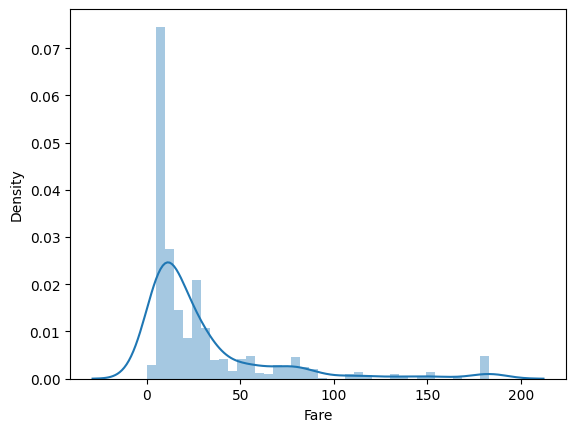

In [98]:
sns.distplot(df['Fare'])
plt.show()